In [4]:

# 20.1 Preprocessing Data for Neural Networks

# Load libraries
from sklearn import preprocessing
import numpy as np

# Create feature
features = np.array([[-100.1, 3240.1],
[-200.2, -234.1],

[5000.5, 150.1],
[6000.6, -125.1],
[9000.9, -673.1]])
# Create scaler
scaler = preprocessing.StandardScaler()
# Transform the feature
features_standardized = scaler.fit_transform(features)
# Show feature
features_standardized

array([[-1.12541308,  1.96429418],
       [-1.15329466, -0.50068741],
       [ 0.29529406, -0.22809346],
       [ 0.57385917, -0.42335076],
       [ 1.40955451, -0.81216255]])

In [7]:
#20.2 Designing a Neural Network
# Load libraries


from keras import models
from keras import layers


model = models.Sequential()


model.add(layers.Dense(16, activation = "relu", input_shape = (10,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = "sigmoid"))

model.compile(loss="binary_crossentropy", # Cross-entropy
optimizer="rmsprop", # Root Mean Square Propagation
metrics=["accuracy"]) # Accuracy performance metric
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 16)                176       
_________________________________________________________________
dense_6 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 465
Trainable params: 465
Non-trainable params: 0
_________________________________________________________________


In [12]:

# 20.3 Training a Binary Classifier

import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer


# Set random seed
np.random.seed(0)
# Set the number of features we want
number_of_features = 1000
# Load data and target vector from movie review data
(data_train, target_train), (data_test, target_test) = imdb.load_data(
num_words=number_of_features)

# Convert movie review data to one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")
# Start neural network
network = models.Sequential()
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu", input_shape=(
number_of_features,)))
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu"))
# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid"))
# Compile neural network
network.compile(loss="binary_crossentropy", # Cross-entropy
optimizer="rmsprop", # Root Mean Square Propagation
metrics=["accuracy"]) # Accuracy performance metric
history = network.fit(
    features_train,
    target_test,
    epochs=3,
    verbose=1,
    batch_size=100,
    validation_data=(features_test,target_test)
)

Epoch 1/3
250/250 [==============================] - 1s 3ms/step - loss: 0.6942 - accuracy: 0.4971 - val_loss: 0.6961 - val_accuracy: 0.4780
Epoch 2/3
250/250 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.5355 - val_loss: 0.6974 - val_accuracy: 0.4847

In [15]:
# 20.4 Training a Multiclass Classifier

# Load libraries
import numpy as np
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers

# Set random seed
np.random.seed(0)
# Set the number of features we want
number_of_features = 5000
# Load feature and target data
data = reuters.load_data(num_words=number_of_features)
(data_train, target_vector_train), (data_test, target_vector_test) = data
# Convert feature data to a one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")
# One-hot encode target vector to create a target matrix
target_train = to_categorical(target_vector_train)
target_test = to_categorical(target_vector_test)
# Start neural network
network = models.Sequential()
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=100,
activation="relu",
input_shape=(number_of_features,)))
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=100, activation="relu"))
# Add fully connected layer with a softmax activation function
network.add(layers.Dense(units=46, activation="softmax"))
# Compile neural network
network.compile(loss="categorical_crossentropy", # Cross-entropy
optimizer="rmsprop", # Root Mean Square Propagation
metrics=["accuracy"]) # Accuracy performance metric
# Train neural network
history = network.fit(features_train, # Features
target_train, # Target
epochs=3, # Three epochs
verbose=0, # No output
batch_size=100, # Number of observations per batch
validation_data=(features_test, target_test)) # Test data


In [16]:

# 20.5 Training a Regressor

# Load libraries
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
# Set random seed
np.random.seed(0)
# Generate features matrix and target vector
features, target = make_regression(n_samples = 10000,
n_features = 3,
n_informative = 3,
n_targets = 1,
noise = 0.0,
random_state = 0)
# Divide our data into training and test sets
features_train, features_test, target_train, target_test = train_test_split(
features, target, test_size=0.33, random_state=0)
# Start neural network
network = models.Sequential()
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=32,
activation="relu",
input_shape=(features_train.shape[1],)))
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=32, activation="relu"))
# Add fully connected layer with no activation function
network.add(layers.Dense(units=1))
# Compile neural network
network.compile(loss="mse", # Mean squared error
optimizer="RMSprop", # Optimization algorithm
metrics=["mse"]) # Mean squared error
# Train neural network
history = network.fit(features_train, # Features
target_train, # Target vector
epochs=10, # Number of epochs
verbose=0, # No output
batch_size=100, # Number of observations per batch
validation_data=(features_test, target_test)) # Test data

In [17]:
# 20.6 Making Predictions

# Load libraries
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
# Set random seed
np.random.seed(0)
# Set the number of features we want
number_of_features = 10000
# Load data and target vector from IMDB movie data
(data_train, target_train), (data_test, target_test) = imdb.load_data(
num_words=number_of_features)
# Convert IMDB data to a one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")
# Start neural network
network = models.Sequential()
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16,
activation="relu",
input_shape=(number_of_features,)))
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu"))
# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid"))
# Compile neural network
network.compile(loss="binary_crossentropy", # Cross-entropy
optimizer="rmsprop", # Root Mean Square Propagation
metrics=["accuracy"]) # Accuracy performance metric
# Train neural network
history = network.fit(features_train, # Features
target_train, # Target vector
epochs=3, # Number of epochs
verbose=0, # No output
batch_size=100, # Number of observations per batch
validation_data=(features_test, target_test)) # Test data
# Predict classes of test set
predicted_target = network.predict(features_test)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
c:\users\hdsak\pycharmprojects\chris_albon_ml_to_deep\new\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
c:\users\hdsak\pycharmprojects\chris_albon_ml_to_deep\new\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndar

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
c:\users\hdsak\pycharmprojects\chris_albon_ml_to_deep\new\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
c:\users\hdsak\pycharmprojects\chris_albon_ml_to_deep\new\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndar

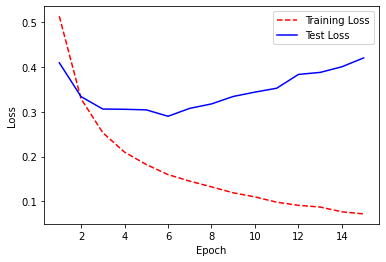

In [18]:
# 20.7 Visualize Training History
import matplotlib.pyplot as plt
# Set random seed
np.random.seed(0)
# Set the number of features we want
number_of_features = 10000
# Load data and target vector from movie review data
(data_train, target_train), (data_test, target_test) = imdb.load_data(
num_words=number_of_features)
# Convert movie review data to a one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")
# Start neural network
network = models.Sequential()
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16,
activation="relu",
input_shape=(number_of_features,)))
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu"))
# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid"))
# Compile neural network
network.compile(loss="binary_crossentropy", # Cross-entropy
optimizer="rmsprop", # Root Mean Square Propagation
metrics=["accuracy"]) # Accuracy performance metric
# Train neural network
history = network.fit(features_train, # Features
target_train, # Target
epochs=15, # Number of epochs
verbose=0, # No output
batch_size=1000, # Number of observations per batch
validation_data=(features_test, target_test)) # Test data
# Get training and test loss histories
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)
# Visualize loss history
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show();

In [19]:
# Get training and test accuracy histories
training_accuracy = history.history["acc"]
test_accuracy = history.history["val_acc"]
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")
# Visualize accuracy history
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show();

KeyError: 'acc'

In [20]:

# 20.8 Reducing Overfitting with Weight Regularization

from keras import regularizers
# Set random seed
np.random.seed(0)
# Set the number of features we want
number_of_features = 1000
# Load data and target vector from movie review data
(data_train, target_train), (data_test, target_test) = imdb.load_data(
num_words=number_of_features)
# Convert movie review data to a one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")
# Start neural network
network = models.Sequential()
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16,
activation="relu",
kernel_regularizer=regularizers.l2(0.01),
input_shape=(number_of_features,)))
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16,
kernel_regularizer=regularizers.l2(0.01),
activation="relu"))
# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid"))
# Compile neural network
network.compile(loss="binary_crossentropy", # Cross-entropy
optimizer="rmsprop", # Root Mean Square Propagation
metrics=["accuracy"]) # Accuracy performance metric
# Train neural network
history = network.fit(features_train, # Features
target_train, # Target vector
epochs=3, # Number of epochs
verbose=0, # No output
batch_size=100, # Number of observations per batch
validation_data=(features_test, target_test)) # Test data

In [23]:

# 20.9 Reducing Overfitting with Early Stopping

from keras.callbacks import EarlyStopping, ModelCheckpoint

np.random.seed(0)

number_of_features = 1000

(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features
)

tokenizer = Tokenizer(num_words=number_of_features)

features_train = tokenizer.sequences_to_matrix(data_train, mode = 'binary')
features_test = tokenizer.sequences_to_matrix(data_train, mode = 'binary')


model = models.Sequential()

model.add(layers.Dense(16,
                       activation='relu',
                       input_shape=(number_of_features,)))
model.add(layers.Dense(
    16,
    activation='relu'
))
model.add(layers.Dense(
    1,
    activation='sigmoid'
))

model.compile(
    loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

callback = [EarlyStopping(
    monitor='val_loss',
    patience=2),ModelCheckpoint(filepath='model.h5', monitor='val_loss', save_best_only=True)]

history = model.fit(
    features_train,
    target_train,
    epochs = 20,
    callbacks = callback,
    verbose = 0,
    batch_size= 100,
    validation_data= (features_test, target_test)
)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
c:\users\hdsak\pycharmprojects\chris_albon_ml_to_deep\new\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
c:\users\hdsak\pycharmprojects\chris_albon_ml_to_deep\new\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndar

In [30]:
# 20.10 Reducing Overfitting with Dropout

np.random.seed(0)

number_of_features = 1000

(data_train, target_train), (data_test, target_test) = imdb.load_data(num_words= number_of_features)

tokenizer = Tokenizer(num_words= number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode='binary')
features_test = tokenizer.sequences_to_matrix(data_test, mode = 'binary')

model = models.Sequential()

model.add(layers.Dropout(0.2, input_shape = (number_of_features,)))
model.add(layers.Dense(16, activation = 'relu'))
# Add a dropout layer for previous hidden layer
model.add(layers.Dropout(0.5))
# Add fully connected layer with a ReLU activation function
model.add(layers.Dense(units=16, activation="relu"))
# Add a dropout layer for previous hidden layer
model.add(layers.Dropout(0.5))
# Add fully connected layer with a sigmoid activation function
model.add(layers.Dense(units=1, activation="sigmoid"))

model.compile(
    optimizer = 'rmsprop',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

history = model.fit(
    features_train,
    target_train,
    epochs = 3,
    verbose= 0,
    validation_data = (features_test, target_test),
    batch_size = 100
)

In [1]:
# 20.11 Saving Model Training Progress
# Load libraries
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.callbacks import ModelCheckpoint
# Set random seed
np.random.seed(0)
# Set the number of features we want
number_of_features = 1000
# Load data and target vector from movie review data
(data_train, target_train), (data_test, target_test) = imdb.load_data(
num_words=number_of_features)
# Convert movie review data to a one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")
# Start neural network
network = models.Sequential()
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16,
activation="relu",
input_shape=(number_of_features,)))
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu"))
# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid"))
# Compile neural network
network.compile(loss="binary_crossentropy", # Cross-entropy
optimizer="rmsprop", # Root Mean Square Propagation
metrics=["accuracy"]) # Accuracy performance metric
# Set callback functions to early stop training and save the best model so far
checkpoint = [ModelCheckpoint(filepath="models.hdf5")]
# Train neural network
history = network.fit(features_train, # Features
target_train, # Target vector
epochs=3, # Number of epochs
callbacks=checkpoint, # Checkpoint
verbose=0, # No output
batch_size=100, # Number of observations per batch
validation_data=(features_test, target_test)) # Test data

In [2]:
# 20.12 k-Fold Cross-Validating Neural Networks


# Load libraries
import numpy as np
from keras import models
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
# Set random seed
np.random.seed(0)
# Number of features
number_of_features = 100
# Generate features matrix and target vector
features, target = make_classification(n_samples = 10000,
    n_features = number_of_features,
    n_informative = 3,
    n_redundant = 0,
    n_classes = 2,
    weights = [.5, .5],
    random_state = 0)
# Create function returning a compiled network
def create_network():
    # Start neural network
    network = models.Sequential()
    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=16, activation="relu", input_shape=(
    number_of_features,)))
    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=16, activation="relu"))
    # Add fully connected layer with a sigmoid activation function
    network.add(layers.Dense(units=1, activation="sigmoid"))
    # Compile neural network
    network.compile(loss="binary_crossentropy", # Cross-entropy
    optimizer="rmsprop", # Root Mean Square Propagation
    metrics=["accuracy"]) # Accuracy performance metric
    # Return compiled network
    return network
# Wrap Keras model so it can be used by scikit-learn
nn = KerasClassifier(
    build_fn = create_network,
    epochs = 10,
    batch_size = 100,
    verbose = 0
)

cross_val_score(nn, features, target, cv= 3)

array([0.90011996, 0.91149116, 0.89378935])

In [4]:
# 20.13 Tuning Neural Networks

from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
# Set random seed
np.random.seed(0)
# Number of features
number_of_features = 100
# Generate features matrix and target vector
features, target = make_classification(n_samples = 10000,
n_features = number_of_features,
n_informative = 3,
n_redundant = 0,
n_classes = 2,
weights = [.5, .5],
random_state = 0)
# Wrap Keras model so it can be used by scikit-learn
# Create function returning a compiled network
def create_network(optimizer="rmsprop"):
    # Start neural network
    network = models.Sequential()
    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=16,
    activation="relu",
    input_shape=(number_of_features,)))
    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=16, activation="relu"))
    # Add fully connected layer with a sigmoid activation function
    network.add(layers.Dense(units=1, activation="sigmoid"))
    # Compile neural network
    network.compile(loss="binary_crossentropy", # Cross-entropy
    optimizer=optimizer, # Optimizer
    metrics=["accuracy"]) # Accuracy performance metric
    # Return compiled network
    return network
neural_network = KerasClassifier(build_fn=create_network, verbose=0)
# Create hyperparameter space
epochs = [5, 10]
batches = [5, 10, 100]
optimizers = ["rmsprop", "adam"]
# Create hyperparameter options
hyperparameters = dict(optimizer=optimizers, epochs=epochs, batch_size=batches)
# Create grid search
grid = GridSearchCV(estimator=neural_network, param_grid=hyperparameters)
# Fit grid search
grid_result = grid.fit(features, target)

In [10]:
# 20.14 Visualizing Neural Networks

# Load libraries
from keras import models
from keras import layers
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
# Start neural network
network = models.Sequential()
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu", input_shape=(10,)))
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu"))
# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid"))
# Visualize network architecture
SVG(model_to_dot(network, show_shapes=True).create(prog="dot", format="svg"))



('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


AttributeError: 'NoneType' object has no attribute 'create'

In [18]:
# Classiefying
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
# Set that the color channel value will be first
K.set_image_data_format("channels_first")
# Set seed
np.random.seed(0)
# Set image information
channels = 1
height = 28
width = 28
# Load data and target from MNIST data
(data_train, target_train), (data_test, target_test) = mnist.load_data()
# Reshape training image data into features
data_train = data_train.reshape(data_train.shape[0], channels, height, width)
# Reshape test image data into features
data_test = data_test.reshape(data_test.shape[0], channels, height, width)
# Rescale pixel intensity to between 0 and 1
features_train = data_train / 255
features_test = data_test / 255
# One-hot encode target
target_train = np_utils.to_categorical(target_train)
target_test = np_utils.to_categorical(target_test)
number_of_classes = target_test.shape[1]
# Start neural network
network = Sequential()
# Add convolutional layer with 64 filters, a 5x5 window, and ReLU activation

network.add(Conv2D(filters=64,
kernel_size=(5, 5),
input_shape=(channels, width, height),
activation='relu'))
# Add max pooling layer with a 2x2 window
network.add(MaxPooling2D())
# Add dropout layer
network.add(Dropout(0.5))
# Add layer to flatten input
network.add(Flatten())
# # Add fully connected layer of 128 units with a ReLU activation function
network.add(Dense(128, activation="relu"))
# Add dropout layer
network.add(Dropout(0.5))
# Add fully connected layer with a softmax activation function
network.add(Dense(number_of_classes, activation="softmax"))
# Compile neural network
network.compile(loss="categorical_crossentropy", # Cross-entropy
optimizer="rmsprop", # Root Mean Square Propagation
metrics=["accuracy"]) # Accuracy performance metric
# Train neural network
network.fit(features_train,
target_train,
epochs=2,
verbose=0,
batch_size=1000,
validation_data=(features_test, target_test))

InvalidArgumentError:  Default MaxPoolingOp only supports NHWC on device type CPU
	 [[node sequential_78/max_pooling2d_5/MaxPool (defined at <ipython-input-18-969331876627>:54) ]] [Op:__inference_train_function_862049]

Function call stack:
train_function


In [19]:

# 20.16 Improving Performance with Image Augmentation

# Load library
from keras.preprocessing.image import ImageDataGenerator
# Create image augmentation
augmentation = ImageDataGenerator(featurewise_center=True, # Apply ZCA whitening
zoom_range=0.3, # Randomly zoom in on images
width_shift_range=0.2, # Randomly shift images
horizontal_flip=True, # Randomly flip images
rotation_range=90) # Randomly rotate
# Process all images from the directory 'raw/images'
augment_images = augmentation.flow_from_directory('need path', # Image folder
batch_size=32, # Batch size
class_mode="binary", # Classes
save_to_dir="processed/images")

FileNotFoundError: [WinError 3] Системе не удается найти указанный путь: 'raw/images'

In [20]:

# 20.17 Classifying Text

# Load libraries
import numpy as np
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import models
from keras import layers
# Set random seed
np.random.seed(0)
# Set the number of features we want
number_of_features = 1000
# Load data and target vector from movie review data
(data_train, target_train), (data_test, target_test) = imdb.load_data(
num_words=number_of_features)
# Use padding or truncation to make each observation have 400 features
features_train = sequence.pad_sequences(data_train, maxlen=400)
features_test = sequence.pad_sequences(data_test, maxlen=400)
# Start neural network
network = models.Sequential()
# Add an embedding layer
network.add(layers.Embedding(input_dim=number_of_features, output_dim=128))
# Add a long short-term memory layer with 128 units
network.add(layers.LSTM(units=128))
# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid"))
# Compile neural network
network.compile(loss="binary_crossentropy", # Cross-entropy
optimizer="Adam", # Adam optimization
metrics=["accuracy"]) # Accuracy performance metric
# Train neural network
history = network.fit(features_train, # Features
target_train, # Target
epochs=3, # Number of epochs
verbose=0, # Do not print description after each epoch
batch_size=1000, # Number of observations per batch
validation_data=(features_test, target_test)) # Test data

ValueError: Shape must be at least rank 3 but is rank 2 for '{{node BiasAdd}} = BiasAdd[T=DT_FLOAT, data_format="NCHW"](add, bias)' with input shapes: [?,512], [512].